In [1]:
#Importing all libraries
import pickle
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


In [2]:
# Reading the dataset

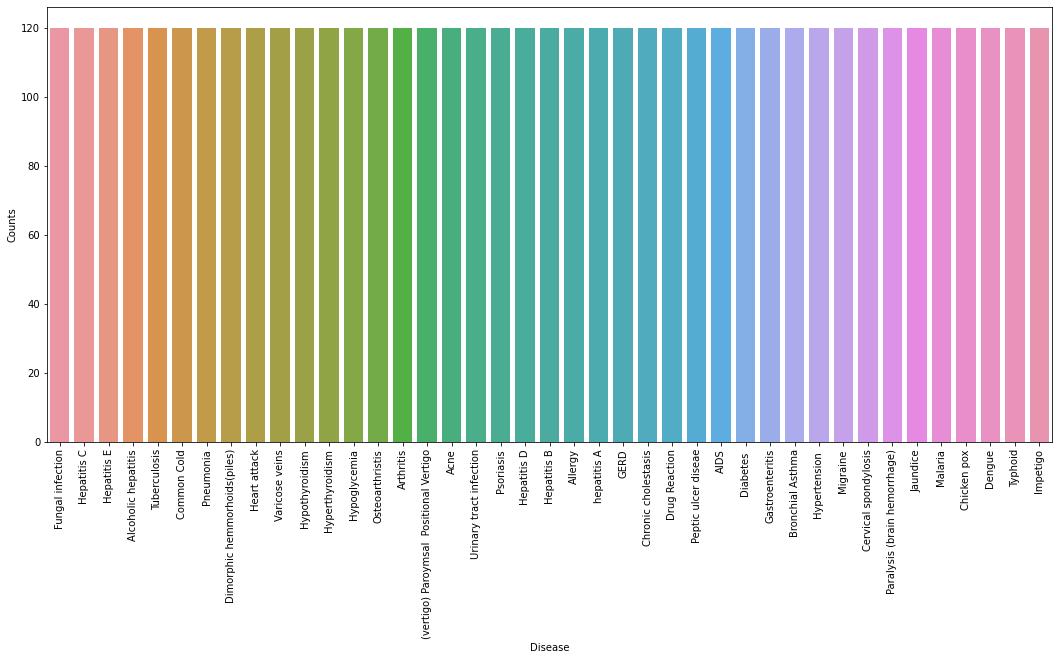

In [3]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({"Disease": disease_counts.index,"Counts": disease_counts.values})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [4]:
# From the above plot, we can observe that the dataset is a balanced dataset i.e. there are exactly 120 samples for each disease, and no further balancing is required.
# We can notice that our target column i.e. prognosis column is of object datatype, this format is not suitable to train a machine learning model.
# So, we will be using a label encoder to convert the prognosis column to the numerical datatype. 
# Label Encoder converts the labels into numerical form by assigning a unique index to the labels. If the total number of labels is n, then the numbers assigned to each label will be between 0 to n-1.

In [5]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])


In [6]:
# Splitting the data for training and testing the model

In [7]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [8]:
# Model Building

In [9]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, X, y, cv = 10,n_jobs = -1,scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [10]:
# From the above output, we can notice that all our machine learning algorithms are performing very well and the mean scores after k fold cross-validation are also very high. 
# To build a robust model we can combine i.e. take the mode of the predictions of all three models so that even one of the models makes wrong predictions and the other two make correct predictions then the final output would be the correct one. 
# This approach will help us to keep the predictions much more accurate on completely unseen data. 
# below we will be training all the three models on the train data, checking the quality of our models using a confusion matrix, and then combine the predictions of all the three models.

Accuracy on train data by SVM Classifier\: 100.0
Accuracy on test data by SVM Classifier\: 100.0


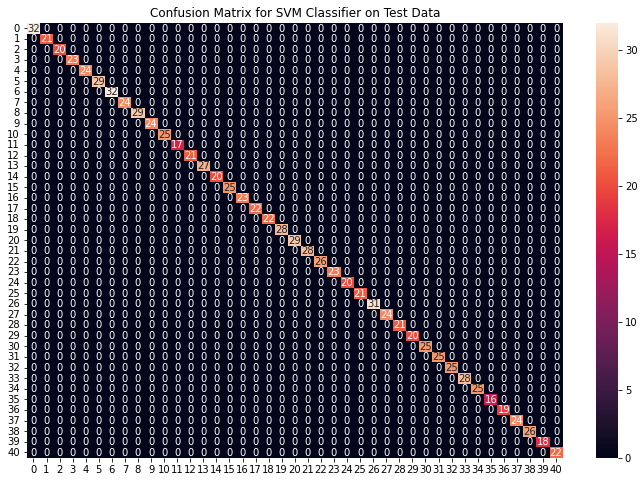

Accuracy on train data by Naive Bayes Classifier\: 100.0
Accuracy on test data by Naive Bayes Classifier\: 100.0


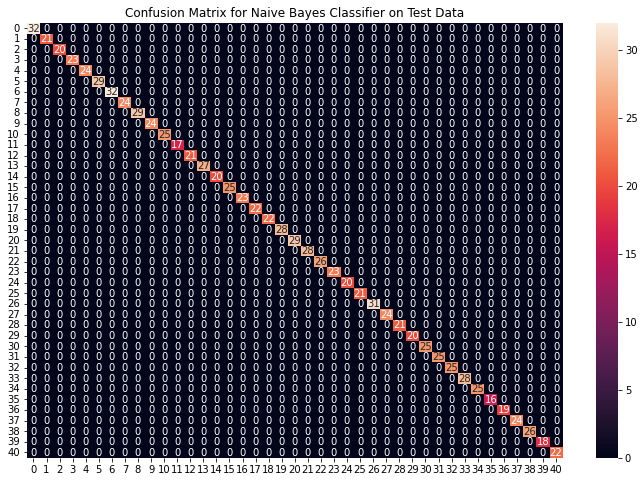

Accuracy on train data by Random Forest Classifier\: 100.0
Accuracy on test data by Random Forest Classifier\: 100.0


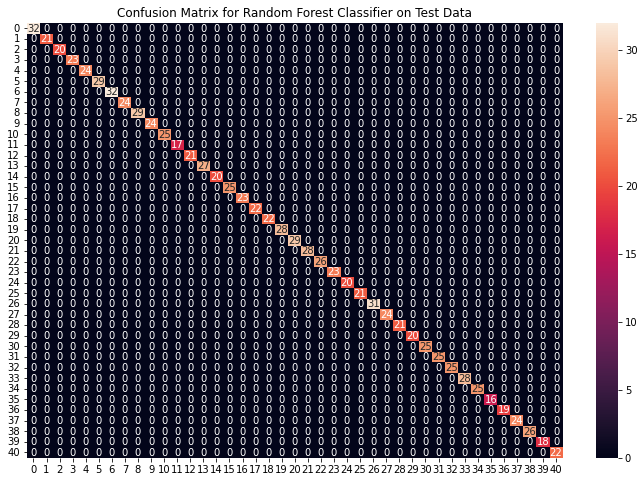

In [11]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


In [12]:
# From the above confusion matrices, we can see that the models are performing very well on the unseen data. 
# Now we will be training the models on the whole train data present in the dataset that we downloaded and then test our combined model on test data present in the dataset.

Accuracy on Test dataset by the combined model\: 100.0


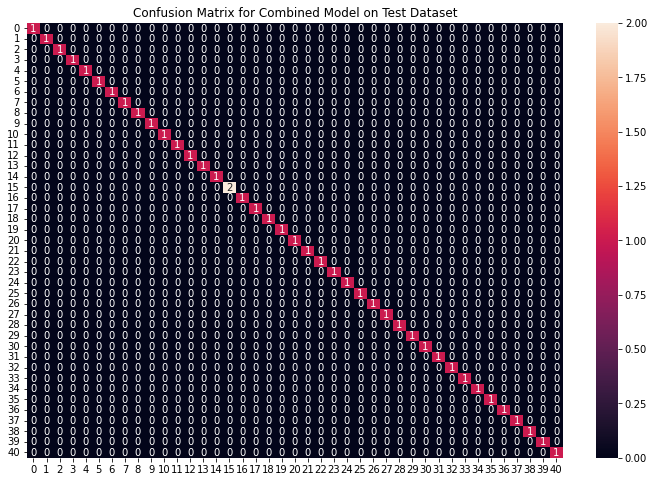

In [13]:
# fitting the model and validating dataset

# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0] for i,j,k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model\: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [14]:
# We can see that our combined model has classified all the data points accurately. 
# We have come to the final part of this whole implementation.
# We will be creating a function that takes symptoms separated by commas as input and outputs the predicted disease using the combined model based on the input symptoms.

In [15]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	
	# creating input data for the models
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
		
	# reshaping the input data and converting it
	# into suitable format for model predictions
	input_data = np.array(input_data).reshape(1,-1)
	
	# generating individual outputs
	rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
	
	# making final prediction by taking mode of all predictions
	final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
	predictions = {
		"rf_model_prediction": rf_prediction,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": nb_prediction,
		"final_prediction":final_prediction
	}
	return predictions

# Testing the function
print(predictDisease("Diarrhoea,Vomiting,Skin Rash"))


{'rf_model_prediction': 'Gastroenteritis', 'naive_bayes_prediction': 'Gastroenteritis', 'svm_model_prediction': 'Gastroenteritis', 'final_prediction': 'Gastroenteritis'}


C:\Users\Admin\Desktop\project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Admin\Desktop\project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Admin\Desktop\project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [16]:
data = {"model": final_svm_model,  "encoder": encoder}
with open('svm.pkl', 'wb') as file:
    pickle.dump(data, file)

In [17]:
data = {"model": final_nb_model,  "encoder": encoder}
with open('nb.pkl', 'wb') as file:
    pickle.dump(data, file)

In [18]:
data = {"model": final_rf_model,  "encoder": encoder}
with open('rf.pkl', 'wb') as file:
    pickle.dump(data, file)